In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import numpy as np

In [2]:
batch_size = 128
n_classes = 10
n_epochs = 15

im_row, im_col = 28, 28

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

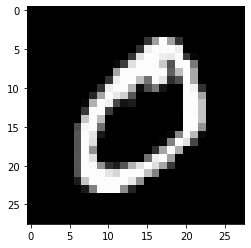

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[1], cmap='gray')
plt.show()

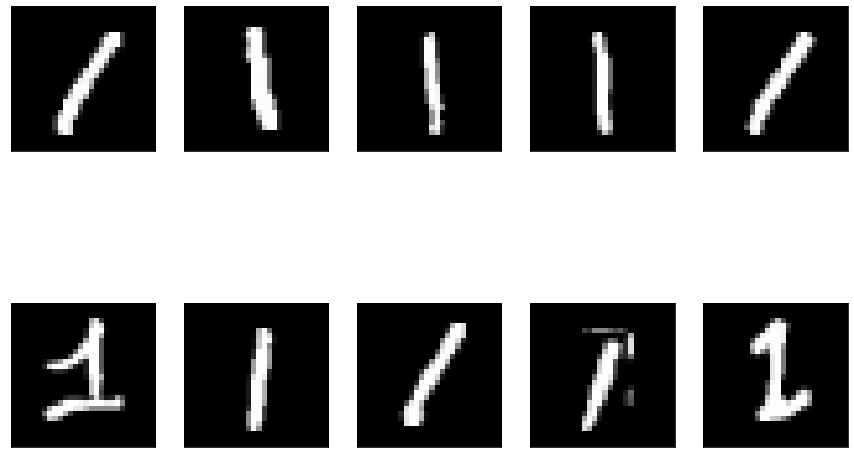

In [5]:
fig = plt.figure(figsize=(15,10))

i = 0
for f in range(0, y_train.shape[0]):
    if(y_train[f] == 1 and i < 10):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_train[f], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        i = i + 1

plt.show()

In [6]:
print("x_train: {}\nx_test: {}\n".format( 
x_train.shape, x_test.shape, ))

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)



In [7]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, im_row, im_col)
    x_test = x_test.reshape(x_test.shape[0], 1, im_row, im_col)
    input_shape = (1, im_row, im_col)
else:
    x_train = x_train.reshape(x_train.shape[0], im_row, im_col, 1)
    x_test = x_test.reshape(x_test.shape[0], im_row, im_col, 1)
    input_shape = (im_row, im_col, 1)

In [8]:
print(y_test[0])

7


In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [10]:
print("x_train: {}\nx_test: {}\ninput_shape: {}\n \
# of training samples: {}\n# of testing samples: {}".format( 
x_train.shape, x_test.shape, input_shape, x_train.shape[0], x_test.shape[0]))

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
input_shape: (28, 28, 1)
 # of training samples: 60000
# of testing samples: 10000


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

2022-07-18 22:15:42.687471: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
checkpoint = ModelCheckpoint(filepath="keras_MNIST_CNN.h5",
                               verbose=0,
                               save_best_only=True)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
469/469 [==============================] - 48s 100ms/step - loss: 0.2461 - accuracy: 0.9243 - val_loss: 0.0515 - val_accuracy: 0.9830
Epoch 2/15
469/469 [==============================] - 48s 103ms/step - loss: 0.0888 - accuracy: 0.9732 - val_loss: 0.0353 - val_accuracy: 0.9887
Epoch 3/15
469/469 [==============================] - 50s 106ms/step - loss: 0.0654 - accuracy: 0.9797 - val_loss: 0.0359 - val_accuracy: 0.9876
Epoch 4/15
469/469 [==============================] - 51s 109ms/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0319 - val_accuracy: 0.9887
Epoch 5/15
469/469 [==============================] - 53s 113ms/step - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.0334 - val_accuracy: 0.9885
Epoch 6/15
469/469 [==============================] - 54s 116ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0270 - val_accuracy: 0.9913
Epoch 7/15
469/469 [==============================] - 52s 111ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.0291 - val_ac

In [13]:
from sklearn.metrics import roc_auc_score

preds = model.predict(x_test)
auc = roc_auc_score(np.round(preds), y_test)
print("AUC: {:.2%}".format (auc))

313/313 [==============================] - 2s 5ms/step
AUC: 99.59%


In [14]:
np.round(preds)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:

preds = model.predict(x_test)
print("Predictions for x_test[0]: {}\n\nActual label for x_test[0]: {}\n".format(preds[0], y_test[0]))
print("Predictions for x_test[0] after rounding: {}\n".format(np.round(preds)[0]))


313/313 [==============================] - 2s 5ms/step
Predictions for x_test[0]: [6.23034952e-17 1.54361468e-13 4.55795178e-13 7.20108218e-12
 3.64400435e-15 1.16590729e-15 5.15215988e-22 1.00000000e+00
 1.11638835e-17 4.29887159e-12]

Actual label for x_test[0]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Predictions for x_test[0] after rounding: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]



1875/1875 [==============================] - 15s 8ms/step


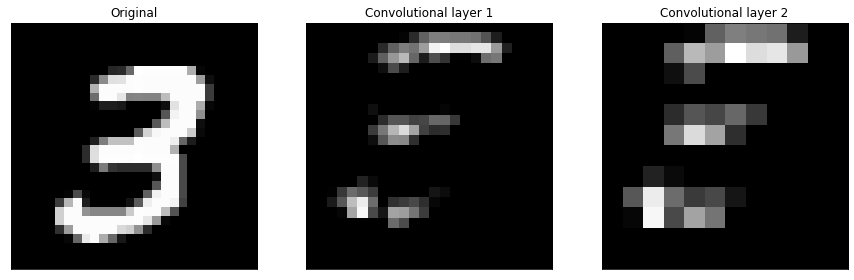

In [16]:
from keras import models

layers = [layer.output for layer in model.layers[:4]] 
model_layers = models.Model(inputs=model.input, outputs=layers) 
activations = model_layers.predict(x_train) 

fig = plt.figure(figsize=(15,10))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(x_train[7].reshape(28, 28), cmap='gray')
plt.xticks([])
plt.yticks([])

for f in range(1, 3):
    plt.subplot(1, 3, f+1)
    plt.title("Convolutional layer %d" % f)
    layer_activation = activations[f]
    plt.imshow(layer_activation[7, :, :, 0], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()


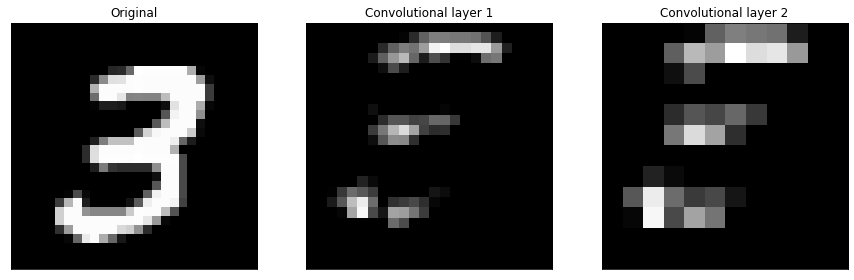

In [17]:
fig = plt.figure(figsize=(15,10))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(x_train[7].reshape(28, 28), cmap='gray')
plt.xticks([])
plt.yticks([])

for f in range(1, 3):
    plt.subplot(1, 3, f+1)
    plt.title("Convolutional layer %d" % f)
    layer_activation = activations[f]
    plt.imshow(layer_activation[7, :, :, 0], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

(60000, 12, 12, 64)


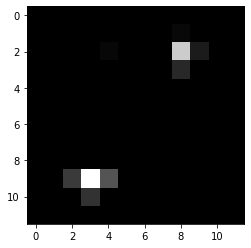

In [18]:
first_layer_activation = activations[2]
print(first_layer_activation.shape)
plt.imshow(first_layer_activation[1, :, :, 4], cmap='gray')

In [19]:

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/15
469/469 [==============================] - 47s 100ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0296 - val_accuracy: 0.9921
Epoch 2/15
469/469 [==============================] - 48s 103ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0247 - val_accuracy: 0.9925
Epoch 3/15
469/469 [==============================] - 47s 101ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.0270 - val_accuracy: 0.9931
Epoch 4/15
469/469 [==============================] - 49s 105ms/step - loss: 0.0141 - accuracy: 0.9950 - val_loss: 0.0282 - val_accuracy: 0.9929
Epoch 5/15
469/469 [==============================] - 48s 103ms/step - loss: 0.0141 - accuracy: 0.9951 - val_loss: 0.0345 - val_accuracy: 0.9926
Epoch 6/15
469/469 [==============================] - 44s 94ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0273 - val_accuracy: 0.9935
Epoch 7/15
469/469 [==============================] - 48s 102ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0319 - val_acc